# Creating a database with artists from image filenames and cleaned art styles

In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
df = pd.read_csv('../raw_data/artists.csv')

## 1. Creating broader art style labels

In [4]:
genre_mapping = {
    "Social Realism,Muralism": "Realism,Muralism",
    "Post-Impressionism": "Impressionism",
    "Northern Renaissance": "Renaissance",
    "Proto Renaissance": "Renaissance",
    "Early Renaissance": "Renaissance",
    "High Renaissance": "Renaissance",
    "Impressionism,Post-Impressionism": "Impressionism",
    "High Renaissance,Mannerism": "Renaissance,Mannerism",
    "Symbolism,Post-Impressionism": "Symbolism,Impressionism",
    "Abstract Expressionism": "Expressionism"
}

In [5]:
def simplify_genre(genre_string):
    return genre_mapping.get(genre_string, genre_string)

df["genre_simplified"] = df["genre"].apply(simplify_genre)

In [7]:
df["genre_simplified"].value_counts()

genre_simplified
Impressionism                              10
Renaissance                                 9
Baroque                                     4
Romanticism                                 3
Expressionism                               2
Surrealism                                  2
Primitivism                                 2
Primitivism,Surrealism                      1
Pop Art                                     1
Neoplasticism                               1
Expressionism,Abstractionism,Surrealism     1
Symbolism,Expressionism                     1
Realism                                     1
Renaissance,Mannerism                       1
Mannerism                                   1
Cubism                                      1
Expressionism,Abstractionism                1
Symbolism                                   1
Suprematism                                 1
Symbolism,Art Nouveau                       1
Byzantine Art                               1
Realism,Impressio

In [8]:
artists_genres = df["genre_simplified"].apply(lambda x: [g.strip() for g in x.split(',') if g.strip()])

In [10]:
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(artists_genres)
print(mlb.classes_)
print(len(mlb.classes_))
genres_dataframe = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=df.index)

['Abstractionism' 'Art Nouveau' 'Baroque' 'Byzantine Art' 'Cubism'
 'Expressionism' 'Impressionism' 'Mannerism' 'Muralism' 'Neoplasticism'
 'Pop Art' 'Primitivism' 'Realism' 'Renaissance' 'Romanticism'
 'Suprematism' 'Surrealism' 'Symbolism']
18


In [11]:
encoded_genres_dataframe = pd.concat([df, genres_dataframe], axis=1)
encoded_genres_dataframe.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings,genre_simplified,Abstractionism,...,Muralism,Neoplasticism,Pop Art,Primitivism,Realism,Renaissance,Romanticism,Suprematism,Surrealism,Symbolism
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193,Expressionism,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88,"Expressionism,Abstractionism",1,...,0,0,0,0,0,0,0,0,0,0
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70,"Realism,Muralism",0,...,1,0,0,0,1,0,0,0,0,0
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73,Impressionism,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194,"Surrealism,Impressionism",0,...,0,0,0,0,0,0,0,0,1,0


## 2. Extracting artists names 

In [12]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # Adds the project root to sys.path

In [13]:
from preprocessing_package.extract_artist_name import create_image_artist_df

image_artist_df = create_image_artist_df(images_root="../raw_data/resized")
image_artist_df.head()

,image_path,artist_name
0,../raw_data/resized/Gustav_Klimt_113.jpg,Gustav Klimt
1,../raw_data/resized/Vincent_van_Gogh_388.jpg,Vincent van Gogh
2,../raw_data/resized/Amedeo_Modigliani_24.jpg,Amedeo Modigliani
3,../raw_data/resized/Edgar_Degas_455.jpg,Edgar Degas
4,../raw_data/resized/Edgar_Degas_333.jpg,Edgar Degas


## 3. Merging databases

In [14]:
# make names lowercase
encoded_genres_dataframe["name"] = encoded_genres_dataframe["name"].str.lower()
image_artist_df["artist_name"] = image_artist_df["artist_name"].str.lower()

# Join on cleaned names
merged_df = image_artist_df.merge(encoded_genres_dataframe, left_on="artist_name", right_on="name", how="left")

In [15]:
# Check if all values in 'artist_name' and 'name' columns are equal
print((merged_df['artist_name'] == merged_df['name']).all())

True


In [16]:
merged_df = merged_df.drop(columns=['name'])

In [16]:
merged_df.head()

,image_path,artist_name,id,years,genre,nationality,bio,wikipedia,paintings,genre_simplified,...,Muralism,Neoplasticism,Pop Art,Primitivism,Realism,Renaissance,Romanticism,Suprematism,Surrealism,Symbolism
0,../raw_data/resized/Gustav_Klimt_113.jpg,gustav klimt,9,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117,"Symbolism,Art Nouveau",...,0,0,0,0,0,0,0,0,0,1
1,../raw_data/resized/Vincent_van_Gogh_388.jpg,vincent van gogh,8,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877,Impressionism,...,0,0,0,0,0,0,0,0,0,0
2,../raw_data/resized/Amedeo_Modigliani_24.jpg,amedeo modigliani,0,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193,Expressionism,...,0,0,0,0,0,0,0,0,0,0
3,../raw_data/resized/Edgar_Degas_455.jpg,edgar degas,30,1834 - 1917,Impressionism,French,Edgar Degas (US: or UK: ; born Hilaire-Germai...,http://en.wikipedia.org/wiki/Edgar_Degas,702,Impressionism,...,0,0,0,0,0,0,0,0,0,0
4,../raw_data/resized/Edgar_Degas_333.jpg,edgar degas,30,1834 - 1917,Impressionism,French,Edgar Degas (US: or UK: ; born Hilaire-Germai...,http://en.wikipedia.org/wiki/Edgar_Degas,702,Impressionism,...,0,0,0,0,0,0,0,0,0,0


In [17]:
merged_df.columns

Index(['image_path', 'artist_name', 'id', 'years', 'genre', 'nationality',
       'bio', 'wikipedia', 'paintings', 'genre_simplified', 'Abstractionism',
       'Art Nouveau', 'Baroque', 'Byzantine Art', 'Cubism', 'Expressionism',
       'Impressionism', 'Mannerism', 'Muralism', 'Neoplasticism', 'Pop Art',
       'Primitivism', 'Realism', 'Renaissance', 'Romanticism', 'Suprematism',
       'Surrealism', 'Symbolism'],
      dtype='object')

In [18]:
# Save the result to CSV
merged_df.to_csv("../raw_data/merged_df.csv", index=False)

In [20]:
merged_df.isnull().sum()

image_path          0
artist_name         0
id                  0
years               0
genre               0
nationality         0
bio                 0
wikipedia           0
paintings           0
genre_simplified    0
Abstractionism      0
Art Nouveau         0
Baroque             0
Byzantine Art       0
Cubism              0
Expressionism       0
Impressionism       0
Mannerism           0
Muralism            0
Neoplasticism       0
Pop Art             0
Primitivism         0
Realism             0
Renaissance         0
Romanticism         0
Suprematism         0
Surrealism          0
Symbolism           0
dtype: int64

In [23]:
merged_df.columns

Index(['image_path', 'artist_name', 'id', 'years', 'genre', 'nationality',
       'bio', 'wikipedia', 'paintings', 'genre_simplified', 'Abstractionism',
       'Art Nouveau', 'Baroque', 'Byzantine Art', 'Cubism', 'Expressionism',
       'Impressionism', 'Mannerism', 'Muralism', 'Neoplasticism', 'Pop Art',
       'Primitivism', 'Realism', 'Renaissance', 'Romanticism', 'Suprematism',
       'Surrealism', 'Symbolism'],
      dtype='object')

In [24]:
import matplotlib.pyplot as plt

# 1. Get the art style columns
style_columns = merged_df.columns[merged_df.columns.get_loc('Abstractionism'):]

# 2. Sum each column to count how many images are associated with each style
style_counts = merged_df[style_columns].sum().sort_values(ascending=False)

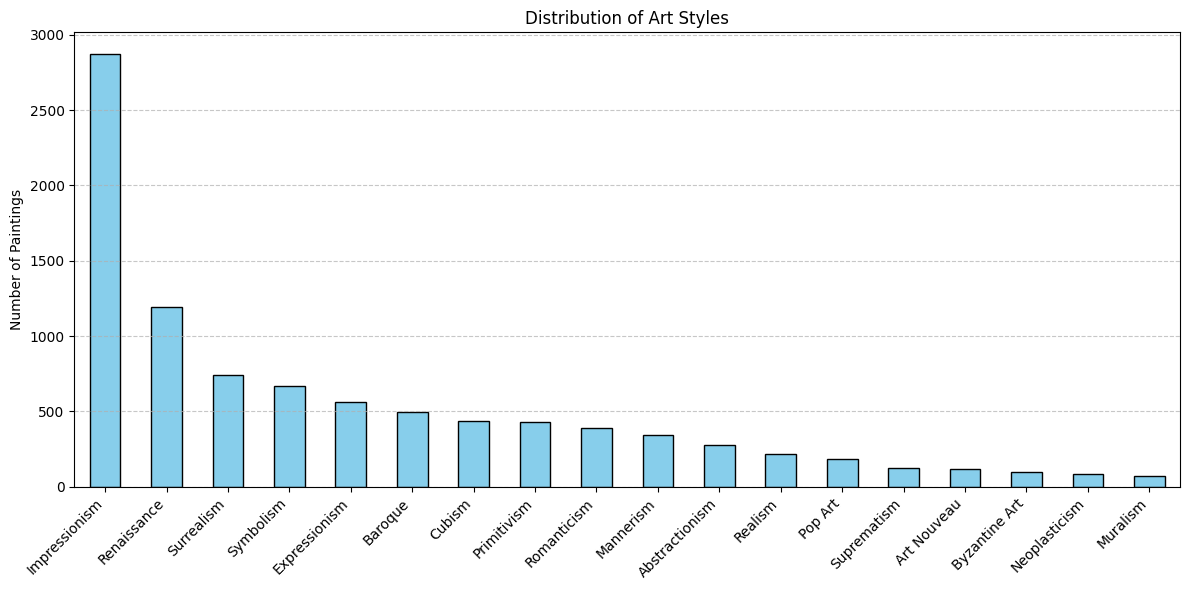

In [25]:
# 3. Plot
plt.figure(figsize=(12, 6))
style_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Art Styles')
plt.ylabel('Number of Paintings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()